In [ ]:
#Import necessary libraries here

import pandas as pd
import matplotlib.pyplot as plt

Haven determined the State in Nigeria, and property type to focus on in creating the machine learning model.

Then I'll subset the dataset to this effect;

# Import

In [ ]:
#Load Data

df = pd.read_csv("/content/drive/MyDrive/Project /nigeria_houses_data.csv")
print(df.shape)
df.info()

(24326, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  float64
 1   bathrooms      24326 non-null  float64
 2   toilets        24326 non-null  float64
 3   parking_space  24326 non-null  float64
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


In [ ]:
#Subset Data: To Detached Duplex in Lagos
mask_state = df["state"] == "Lagos"
mask_title = df["title"] == "Detached Duplex"
df_lagos= df[mask_state & mask_title]

print("Shape of the Dataset is",df_lagos.shape)
print("State in Nigeria: ",df_lagos["state"].unique())
print ("property type:",df_lagos["title"].unique())

Shape of the Dataset is (11802, 8)
State in Nigeria:  ['Lagos']
property type: ['Detached Duplex']


Notice, we are now left with 11,802 houses which are Detached Duplex in Lagos. 

This is unlike the original Dataset where we have 24,326 houses across 25 states in Nigeria and of 7 distinct types.

Now, to further explore this subset of our Dataset;

# Explore

To identify the town in Lagos where the houses are located;

In [ ]:
print(df_lagos["town"].unique())

no_of_towns= df_lagos["town"].nunique()

print (f"These are {no_of_towns} towns in total.")

['Lekki' 'Ajah' 'Victoria Island (VI)' 'Ikoyi' 'Magodo' 'Agege' 'Ikeja'
 'Isheri North' 'Isheri' 'Isolo' 'Ojodu' 'Surulere' 'Ibeju Lekki'
 'Gbagada' 'Maryland' 'Ikorodu' 'Ifako-Ijaiye' 'Ikotun' 'Ogudu' 'Alimosho'
 'Ojo' 'Yaba' 'Ayobo' 'Ejigbo' 'Oshodi' 'Amuwo Odofin' 'Ketu' 'Ilupeju'
 'Apapa' 'Ipaja' 'Kosofe' 'Agbara-Igbesa' 'Badagry' 'Lagos Island']
These are 34 towns in total.


By the way, let's see which town in Lagos has the most expensive real estate market...

And investigate if housing prices vary by town? If so, which are the most expensive towns for purchasing a home?

In [ ]:
mean_price_by_town= df_lagos.groupby("town")["price"].mean().sort_values(ascending= False).astype(int)
mean_price_by_town

town
Ikoyi                   2531886956
Ifako-Ijaiye            2231860000
Lagos Island             425000000
Victoria Island (VI)     385196078
Apapa                    352142857
Lekki                    230285773
Ikeja                    192291778
Magodo                   163331250
Kosofe                   155000000
Isheri                   137500000
Ogudu                    123333333
Ajah                     118674928
Surulere                 117457142
Ilupeju                  116727272
Amuwo Odofin             116678571
Oshodi                   116666666
Isheri North             113367592
Maryland                 111583333
Yaba                      92812500
Gbagada                   83115384
Ojodu                     80135135
Ikotun                    79000000
Isolo                     78988372
Ibeju Lekki               70745000
Agege                     63305555
Ketu                      60000000
Alimosho                  59763157
Agbara-Igbesa             55000000
Ejigbo         

Now, to create a Bar Chat of our result;

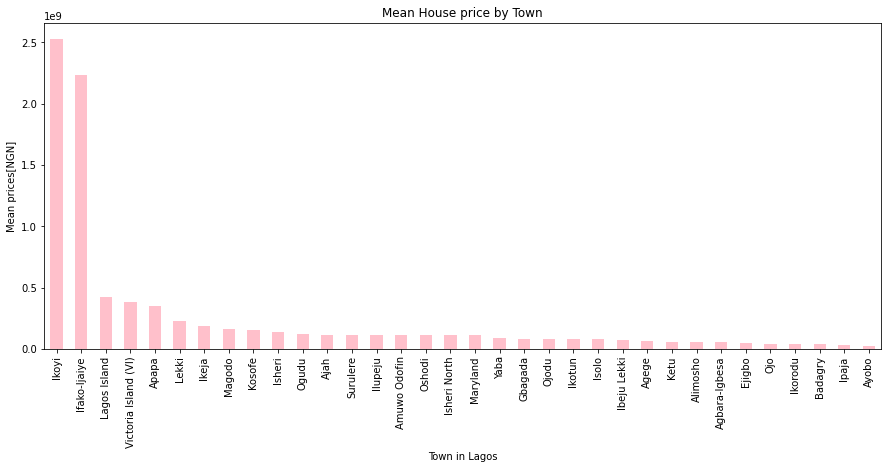

In [ ]:
#canvas size
fig, ax = plt.subplots(figsize = (15, 6))

#Bar Chart 
mean_price_by_town.plot(
kind = "bar",
xlabel = "Town in Lagos",
ylabel = "Mean prices[NGN]",
title = "Mean House price by Town",
color = "pink",
ax = ax
  )

With the result above, it can be seen that Ikoyi is by far the most expensive real estate market in Lagos, followed by Ifako-Ijaye. 

Thus, the housing price varies by town in Lagos State, Nigeria.

Much more, let's explore the distribution of the house prices, and check if there are any outliers

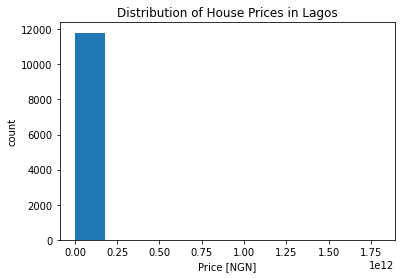

In [ ]:
plt.hist(df_lagos["price"])
plt.xlabel("Price [NGN]")
plt.ylabel("count")
plt.title("Distribution of House Prices in Lagos");

Yippee! Histogram like that above, indicates the presence of outliers.

Let's further investigate into that;

In [ ]:
df_lagos["price"].describe().astype(int)

count            11802
mean         427997003
std        16956711930
min             350000
25%           85000000
50%          130000000
75%          245000000
max      1800000000000
Name: price, dtype: int64

Observe, the maximum house price in our Dataset is #1,800,000,000,000 while the mean is #301,380,208 . That's a huge gap, even when compared with the quartiles.

Thus, we'll be removing the outliers by removing houses with outrageous prices

In [ ]:

#Removing outliers in price distribution

high = df["price"].quantile(.9)
mask_price = df["price"] < high

df_clean = df_lagos[mask_price]

df_clean["price"].describe(). astype (int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


count        10088
mean     131597095
std       71617764
min         350000
25%       80000000
50%      120000000
75%      160000000
max      345000000
Name: price, dtype: int64

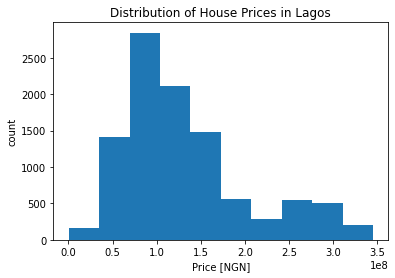

In [ ]:
#Histogram for the cleaned Dataset 

plt.hist(df_clean["price"])
plt.xlabel("Price [NGN]")
plt.ylabel("count")
plt.title("Distribution of House Prices in Lagos");

Furthermore, to check if there's a relationship between the number of bedrooms and house prices.

Scatter plot will come in handy here, as it will help us see if the two variables are correlated;

Text(0.5, 1.0, 'Lagos Detached Duplex: Price vs. Bedroom')

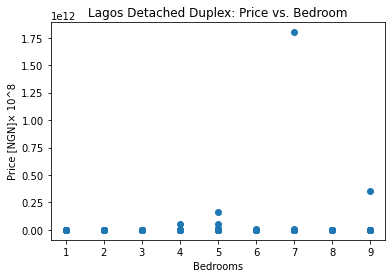

In [ ]:

#scatter plot using Matplot lib

plt.scatter(df["bedrooms"], df["price"])
plt.xlabel("Bedrooms")
plt.ylabel("Price [NGN]× 10^8")
plt.title ("Lagos Detached Duplex: Price vs. Bedroom")

Oh! There's no correlation between the House prices and the number of bedrooms.

Let's compute the Pearson correlation coefficient for the variables to see what we have actually.

In [ ]:
p_correlation = df["bedrooms"].corr(df["price"])
p_correlation

0.0367233005702489

Looking at the scatter plot and the correlation coefficient(which is close to zero), there's a very weak relationship between the House price and the number of bedrooms.

This implies that there are other factors aside the number of bedrooms, that has a larger influence on the house price in Lagos State, Nigeria— One of which is the location of the house .

# Conclusion

 Now we've seen that the town in which the Detached Duplex is located in Lagos State, will be one of the features in our Dataset with which we'll create our model .

...be on the look out for my next post on how I progressed in the project, and discover how I determined other features in our Dataset that will improve our model, and the ones to be dropped.